## Content
> ### Game of Thrones
* Predicting outcomes of battle 
> GANS

# Predict the season finale of GOT

* For people who are living under a rock.

Game of Thrones is an American fantasy drama television series created by David Benioff and D. B. Weiss. It is an adaptation of A Song of Ice and Fire, George R. R. Martin's series of fantasy novels, the first of which is A Game of Thrones.

**Super short version** :
Several noble houses fight a civil war over who should be king, while an exiled princess tries to find her place in the world, and the kingdom is threatened by some rising supernatural threat in the north.With battles,zombies,dragons,a wise dwarf, unexpected deaths and sorry many unexpected deaths this definetly is a must watch.

<img src="images/conquest-fightforbanner.jpg" height="800" width="800">

> The data for today's experimentation could be downloaded by [clicking here](https://www.kaggle.com/mylesoneill/game-of-thrones/data)

> #### Place your extracted in the concerned 
* For Linux Users
    * mkdir data
    * unzip game-of-thrones.zip
* For Windows Users
    * create a folder called data
    * unzip into the concerned file

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook

path="data/game-of-thrones/"

In [60]:
#Lets start by looking at the data we have
battles=pd.read_csv(path+"battles.csv")
# character_deaths=pd.read_csv(path+"character-deaths.csv")
# character_predictions=pd.read_csv(path+"character-predictions.csv")

<img src="images/maths.gif" height="800" width="800">


> #### Steps to follow before making any predictions
* Try to have a brief overview of what the data looks like,what the columns are
* What kind of data is present in what category and whats the total number of non-null values
* Handle Empty /Errorenoes values
* Encoding
* Modelling 

> #### Findings
* Data of 38 battles with 28 columns
* attacker_i & defender_i have most empty
* Numerical fields include [battle_number ,major_death,major_capture,attacker_size,defender_size,summmer]
* Categorical Field include [attacker_king,defender_king,battle_type,attacker_commander,defender_commander,location,region]
* Next to 0 time related information

In [61]:
battles.head()
# battles.info()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


### Major death/capture events by year


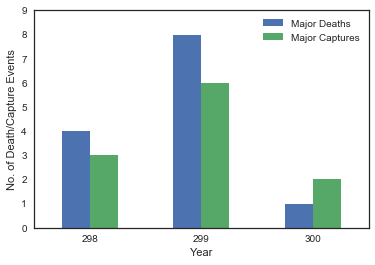

In [62]:
p = battles.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0)
_ = p.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), p.legend(["Major Deaths", "Major Captures"])

### Impact of army size on outcome


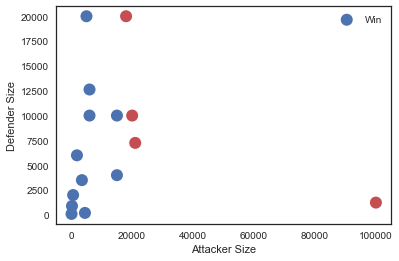

In [63]:
# data=battles.copy(deep=True)
data = battles.dropna(axis = 0, subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
colors = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] for x in data.attacker_outcome.values]
p = data.plot.scatter("attacker_size", "defender_size", c = colors, s = 100, lw = 2.)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size"),p.legend(["Win","Loss"])

### Do larger armies necessarily win?
<img src="images/battle_of_bastards.gif" height="800" width="800">


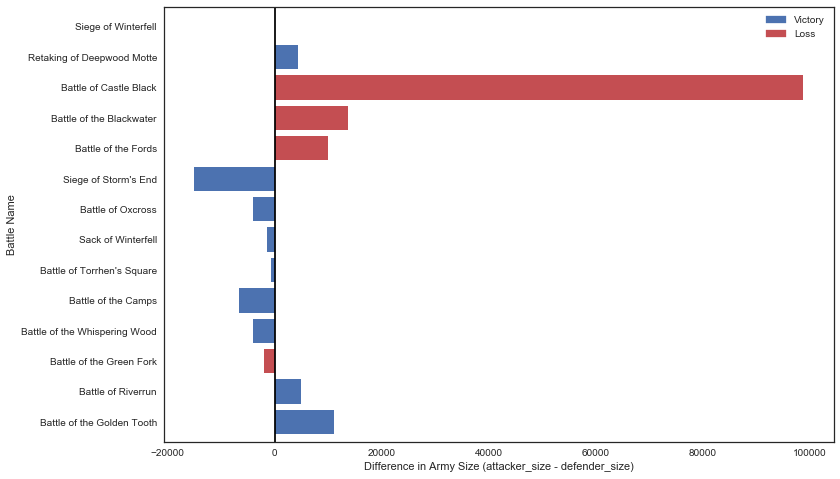

In [64]:
data = battles.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)
data = pd.concat([(data.attacker_size - data.defender_size).to_frame(), battles[["attacker_outcome"]]], axis = 1, join = "inner")
data = data[data[0] != 0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Victory", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = battles.name.iloc[data.index].values, xlabel = "Difference in Army Size (attacker_size - defender_size)", ylabel = "Battle Name")

### Lets see how the attackers have performed


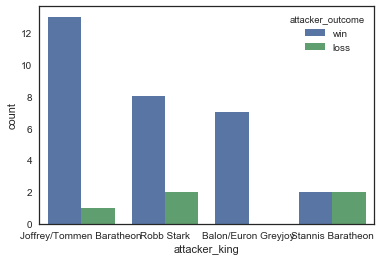

In [65]:
sns.countplot(x='attacker_king',data=battles,hue='attacker_outcome')

### How many commanders did armies of different kings have?
> [How to read a box plot](http://www.statisticshowto.com/how-to-read-a-box-plot/)

In [66]:
#Adding further features to aid in predictions and analysis
battles.loc[:, "defender_allies"] = (3 - battles[[ "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_allies"] = (3 - battles[[ "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
battles.loc[:, "att_comm_count"] = [len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]

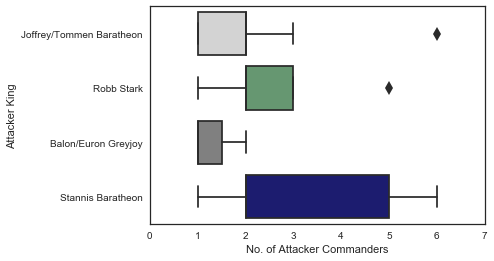

In [67]:
bx = sns.boxplot("att_comm_count", "attacker_king", data = battles, saturation = .6, fliersize = 10., palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = bx.set(xlabel = "No. of Attacker Commanders", ylabel = "Attacker King", xticks = range(8))

## Predicting the Red Wedding
The Red Wedding is a massacre during the War of the Five Kings arranged by Lord Walder Frey as revenge against King Robb Stark for breaking the marriage pact between House Stark and House Frey.During the massacre, King Robb, his wife, Queen Talisa, his mother, Lady Catelyn, most of his bannermen and men-at-arms (~ 15.000 men) are murdered following the marriage feast and bedding of Edmure Tully, Robb's uncle, and Roslin Frey.
<img src="images/red_wedding.gif"  height="800" width="800">

### Encoding Target Variables

In [68]:
battles=battles[battles['attacker_outcome'].notnull()]
#convert wins and loss to int
battles['attacker_outcome'].replace('win',1,inplace=True)
battles['attacker_outcome'].replace('loss',0,inplace=True)

y=battles['attacker_outcome']

### Encoding Categorical Variables

There are many ways to encode categorical variables.Like one-hot encoding,binary-encoding, ordered encoding.
Each of these have their advantages and distadvantages.We will be using one hot encoding to encode our categorical variables.
We will be using one-hot encoding.
<img src="images/one_hot_encoding.png">

> Links to Additional Resources
* [Click Here to know about the methods to deal with Categorical Variables](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/)
* [beyond-one-hot-exploration-categorical-variables](https://www.kdnuggets.com/2015/12/beyond-one-hot-exploration-categorical-variables.html)
* [categorical-encoding](http://pbpython.com/categorical-encoding.html)
* [What is one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)
    

In [70]:
data=battles.copy(deep=True)
#Encode Categorical columns
categorical_columns=['attacker_king','defender_king','attacker_1','defender_1','battle_type','region']
def encode_categories(data,columns):
    temp=data['name']
    for col in columns:
        temp=pd.concat([temp,pd.get_dummies(data[col])],axis=1)
    return temp
one_hot_encoded=encode_categories(data,categorical_columns)

### Encoding Numerical Data

* Filling Empty Values
    * [https://machinelearningmastery.com/handle-missing-data-python/](https://machinelearningmastery.com/handle-missing-data-python/)
* Normalisation
    *
    * [when-is-normalization-of-data-required](https://discuss.analyticsvidhya.com/t/when-is-normalization-of-data-required/7682/2)
    * [https://www.researchgate.net/post/When_and_why_do_we_need_data_normalization](https://www.researchgate.net/post/When_and_why_do_we_need_data_normalization)
    

In [71]:
##Dropping unneccessar columns
numerical=data.drop(['year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1','attacker_outcome','location','region','note',
       'defender_2', 'defender_3', 'defender_4','battle_type', 'attacker_commander', 'defender_commander'],axis=1)
numerical.describe()

,major_death,major_capture,attacker_size,defender_size,summer,defender_allies,attacker_allies,att_comm_count
count,37.000000,37.000000,23.000000,18.000000,36.000000,37.000000,37.000000,36.000000
mean,0.351351,0.297297,10157.434783,6340.833333,0.722222,0.027027,0.324324,2.138889
std,0.483978,0.463373,20710.995224,6393.673861,0.454257,0.164399,0.668915,1.396992
min,0.000000,0.000000,20.000000,100.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1250.000000,985.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,3500.000000,5000.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,10500.000000,10000.000000,1.000000,0.000000,0.000000,2.250000
max,1.000000,1.000000,100000.000000,20000.000000,1.000000,1.000000,3.000000,6.000000


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# Handling Numerical Variables
mean_of_all_numerical_columns=numerical.describe().reset_index().iloc[1].to_dict()
del mean_of_all_numerical_columns['index']

for col in numerical.columns:
    if col!='name':
        numerical[col].fillna(mean_of_all_numerical_columns[col],inplace=True)
# normalizing numerical data
for col in numerical.columns:
    if col!='name':
        numerical[col]=(numerical[col]-numerical[col].mean())/numerical[col].std()
print (numerical.head())


                            name  major_death  major_capture  attacker_size  \
0     Battle of the Golden Tooth     1.340245      -0.641594   2.990986e-01   
1    Battle at the Mummer's Ford     1.340245      -0.641594  -1.123490e-16   
2             Battle of Riverrun    -0.725966       1.516494   2.990986e-01   
3       Battle of the Green Fork     1.340245       1.516494   4.843921e-01   
4  Battle of the Whispering Wood     1.340245       1.516494  -5.115605e-01   

   defender_size    summer  defender_allies  attacker_allies  att_comm_count  
0      -0.532779  0.620174        -0.164399        -0.484851       -0.826808  
1      -1.415875  0.620174        -0.164399        -0.484851       -0.826808  
2       0.832834  0.620174        -0.164399        -0.484851       -0.100830  
3       3.108855  0.620174        -0.164399        -0.484851        2.077103  
4      -0.077574  0.620174        -0.164399         1.010107       -0.100830  


### Encoding Date/Time Fields

Currently we do not have any fields which denote time.Though its very common to have such type of fields in real cases.
Dates are usally converted to seperate date-month-year. A lot of derived features are created using the date to aid in the analysis. like
* What day was it?
* Which week was it?
* Was it a holiday?
and so on?


Encoding them is depends on you.
* you could consider them as number
* or you could consider them as categorical variable
* Better approach is considering them as cyclic variables.Since they repeat. so the value is replaced by sin/cos of the label encoded


>Notes
* https://cs.stackexchange.com/questions/14634/how-to-encode-date-as-input-in-neural-network
* https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
* https://stats.stackexchange.com/questions/126230/optimal-construction-of-day-feature-in-neural-networks

### Encoding Text

* cleaning the text
* lemmatizing and stemming
* using pre-trained model 

> Notes
* https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
* https://www.reddit.com/r/MachineLearning/comments/15rqqa/alternatives_to_bag_of_words_for_text_encoding/

### Segregating Training and testing data

In [73]:
all_data=pd.concat([one_hot_encoded,numerical.drop("name",axis=1),y],axis=1)
train=all_data[all_data['name']!='The Red Wedding']
test=all_data[all_data['name']=='The Red Wedding']

In [74]:
train_y=train['attacker_outcome']
train_data=train.drop(['name','attacker_outcome'],axis=1)

### Building Models

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB()]


### Cross Validatoion
* https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

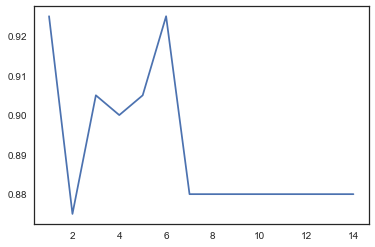

In [76]:
from sklearn.model_selection import cross_val_score
k_range = range(1,15)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,train_data,train_y,cv=10,scoring='accuracy')
    scores_list.append(scores.mean())

plt.plot(k_range,scores_list)

In [77]:
from sklearn.cross_validation import cross_val_score
for name,classifier in zip(names,classifiers):
    scores = cross_val_score(classifier,train_data,train_y,cv=10,scoring='accuracy')
    print (f"Name:{name} Accuracy:{scores.mean()}")

Name:Nearest Neighbors Accuracy:0.905
Name:Linear SVM Accuracy:0.8800000000000001
Name:RBF SVM Accuracy:0.8800000000000001
Name:Gaussian Process Accuracy:0.925
Name:Decision Tree Accuracy:0.975
Name:Random Forest Accuracy:0.8800000000000001
Name:Neural Net Accuracy:0.925
Name:AdaBoost Accuracy:0.975
Name:Naive Bayes Accuracy:0.7966666666666666


### Ensembles


In [78]:
from sklearn.ensemble import VotingClassifier
names = ["Decision Tree", "AdaBoost","Naive Bayes"]

classifiers = [DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    GaussianNB()]

ensemble_model = VotingClassifier(estimators=list(zip(names,classifiers)))
scores=cross_val_score(ensemble_model,train_data,train_y,cv=10,scoring='accuracy')
scores.mean()

0.97499999999999998

In [79]:
knn.fit(train_data,train_y)

knn.predict(test.drop(['name','attacker_outcome'],axis=1))

array([1])

#### HomeWork :                                         Predict John Targarean vs Night King
<img src="images/white_walker.gif" height="800" width="800">


# GANS

<img src="images/representative_image_512x256.png">

* https://distill.pub/2016/deconv-checkerboard/
* http://make.girls.moe/#/

> Additional Reading
* https://medium.com/@Moscow25/gans-will-change-the-world-7ed6ae8515ca
* https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/
* 

In [81]:
% matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchvision import datasets, models, transforms, utils
import numpy as np
import matplotlib.pyplot as plt
import os

import itertools
import math
import time

import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython import display
from torch.autograd import Variable

In [82]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_dataset = dsets.MNIST(root='./data/', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)

In [83]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        out = out.view(out.size(0), -1)
        return out
    

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

In [84]:
discriminator = Discriminator()
generator = Generator()

In [85]:
criterion = nn.BCELoss()
lr = 0.0002
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

In [86]:
def train_discriminator(discriminator, images, real_labels, fake_images, fake_labels):
    discriminator.zero_grad()
    outputs = discriminator(images)
    real_loss = criterion(outputs, real_labels)
    real_score = outputs
    
    outputs = discriminator(fake_images) 
    fake_loss = criterion(outputs, fake_labels)
    fake_score = outputs

    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss, real_score, fake_score

def train_generator(generator, discriminator_outputs, real_labels):
    generator.zero_grad()
    g_loss = criterion(discriminator_outputs, real_labels)
    g_loss.backward()
    g_optimizer.step()
    return g_loss

In [87]:

# draw samples from the input distribution to inspect the generation on training 
num_test_samples = 16
test_noise = Variable(torch.randn(num_test_samples, 100))

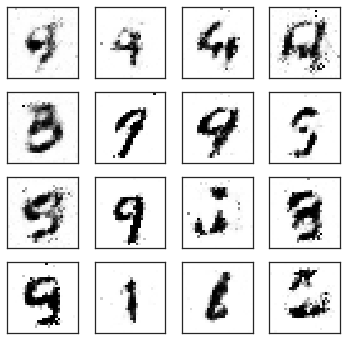

Epoch [23/200], Step[100/600], d_loss: 0.9097, g_loss: 1.5218, D(x): 0.69, D(G(z)): 0.30


In [ ]:
# create figure for plotting
size_figure_grid = int(math.sqrt(num_test_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

# set number of epochs and initialize figure counter
num_epochs = 200
num_batches = len(train_loader)
num_fig = 0


for epoch in range(num_epochs):
    for n, (images, _) in enumerate(train_loader):
        images = Variable(images)
        real_labels = Variable(torch.ones(images.size(0)))
        
        # Sample from generator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        fake_labels = Variable(torch.zeros(images.size(0)))
        
        # Train the discriminator
        d_loss, real_score, fake_score = train_discriminator(discriminator, images, real_labels, fake_images, fake_labels)
        
        # Sample again from the generator and get output from discriminator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        outputs = discriminator(fake_images)

        # Train the generator
        g_loss = train_generator(generator, outputs, real_labels)
        
        if (n+1) % 100 == 0:
            test_images = generator(test_noise)
            
            for k in range(num_test_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k,:].data.cpu().numpy().reshape(28, 28), cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            
            plt.savefig('results/mnist-gan-%03d.png'%num_fig)
            num_fig += 1
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, ' 
                  'D(x): %.2f, D(G(z)): %.2f' 
                  %(epoch + 1, num_epochs, n+1, num_batches, d_loss.data[0], g_loss.data[0],
                    real_score.data.mean(), fake_score.data.mean()))

In [ ]:
torch.save(generator,"generator_200")
torch.save(discriminator,"discriminator_200")

In [ ]:
ls